In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

Load Dataset

In [2]:
# =======================
# 2. Load Dataset
# =======================
# Dataset from Kaggle:
# https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

df = pd.read_csv("Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Explore Data

(2200, 8)
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


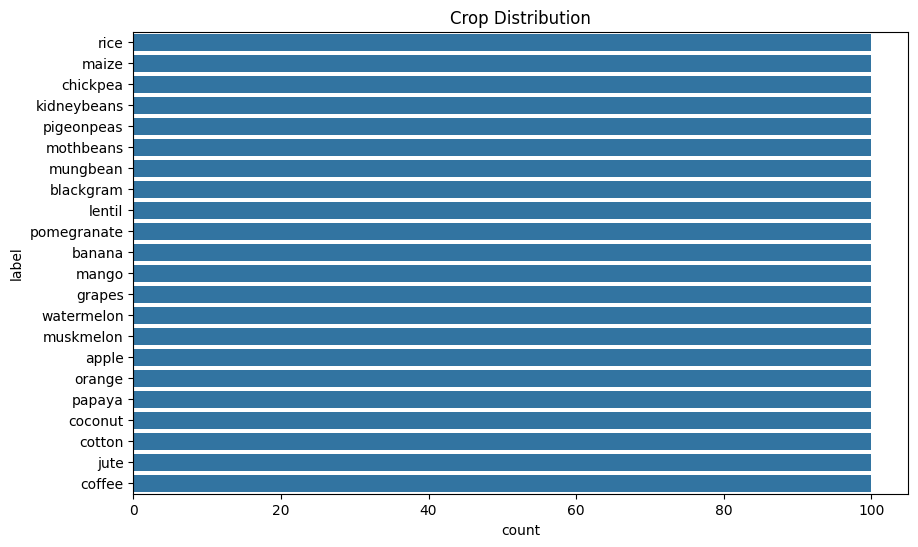

In [3]:
# =======================
# 3. Explore Data
# =======================
print(df.shape)
print(df['label'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index)
plt.title("Crop Distribution")
plt.show()


Preprocessing

In [4]:
# =======================
# 4. Preprocessing
# =======================
X = df.drop("label", axis=1)
y = df["label"]

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


Build Deep Learning Model

In [5]:
# =======================
# 5. Build Deep Learning Model
# =======================
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\parth\OneDrive\Desktop\tensorflow\tfvenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 22)                  │             726 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,982 (50.71 KB)

 Trainable params: 12,534 (48.96 KB)

 Non-trainable params: 448 (1.75 KB)

Train Model

In [6]:
# =======================
# 6. Train Model
# =======================
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.1960 - loss: 2.7041 - val_accuracy: 0.3210 - val_loss: 2.7089
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5007 - loss: 1.7508 - val_accuracy: 0.4489 - val_loss: 2.3478
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6491 - loss: 1.3571 - val_accuracy: 0.5710 - val_loss: 1.9593
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7166 - loss: 1.1077 - val_accuracy: 0.7443 - val_loss: 1.5427
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7855 - loss: 0.9061 - val_accuracy: 0.8778 - val_loss: 1.1550
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8125 - loss: 0.7594 - val_accuracy: 0.9489 - val_loss: 0.8134
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8246 - loss: 0.6633 - val_accuracy: 0.9688 - val_loss: 0.5668
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8629 - loss: 0.5648 - val_accuracy: 0.9602 - 

Evaluate Model

✅ Test Accuracy: 99.77%
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00  

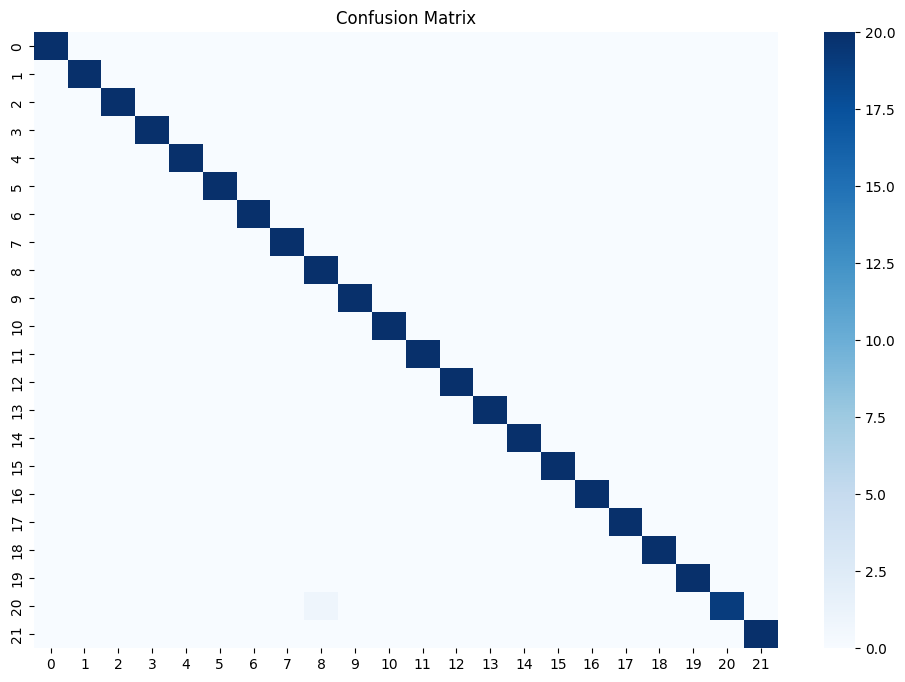

In [7]:
# =======================
# 7. Evaluate Model
# =======================
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Prediction Function

In [8]:
# =======================
# 8. Prediction Function
# =======================
def recommend_crop(N, P, K, temp, humidity, ph, rainfall):
    data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
    data = scaler.transform(data)
    prediction = model.predict(data).argmax(axis=1)
    return encoder.inverse_transform(prediction)[0]

# Example
print("Recommended Crop:", recommend_crop(66,44,20,19.0781471,69.02298571,6.740000687999999,80.72515943))


C:\Users\parth\OneDrive\Desktop\tensorflow\tfvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Recommended Crop: maize


Crop Details Dictionary

In [9]:
# =======================
# Crop Details Dictionary
# =======================
crop_details = {
    "rice": "Rice requires high humidity, temperature of 20-35°C, and rainfall above 100 cm. Best grown in clayey, loamy soil.",
    "maize": "Maize grows well in temperatures of 18-27°C, with 50-100 cm rainfall. Prefers well-drained fertile loamy soil.",
    "chickpea": "Chickpea needs dry and cool climate, grows well in loamy soil with 40-60 cm rainfall.",
    "kidneybeans": "Kidney beans prefer warm climates, grow well in sandy loam soil with moderate rainfall (60-120 cm).",
    "pigeonpeas": "Pigeon peas grow in warm humid climate, loamy soil, and need 60-100 cm rainfall.",
    "mothbeans": "Moth beans grow in arid/semi-arid regions, require sandy soil and low to moderate rainfall (30-60 cm).",
    "mungbean": "Mung beans prefer warm climate, sandy loam soil, and moderate rainfall of 60-90 cm.",
    "blackgram": "Black gram grows well in warm climate, loamy soil, with 60-90 cm rainfall.",
    "lentil": "Lentil needs cool climate, loamy soil, and low to moderate rainfall (30-50 cm).",
    "pomegranate": "Pomegranate requires hot and dry climate, loamy soil, and can grow in rainfall around 50-100 cm.",
    "banana": "Banana grows in warm, humid conditions, 25-30°C temperature, high rainfall (100-200 cm), and rich loamy soil.",
    "mango": "Mango needs tropical/subtropical climate, well-drained loamy soil, and 75-250 cm rainfall.",
    "grapes": "Grapes require 15-35°C temperature, loamy soil, moderate rainfall (50-80 cm).",
    "watermelon": "Watermelon grows in warm climate, sandy loam soil, and requires 50-75 cm rainfall.",
    "muskmelon": "Muskmelon grows in hot dry climate, sandy loam soil, and 50-75 cm rainfall.",
    "apple": "Apple needs temperate climate, 21-24°C, loamy soil, and 100-125 cm rainfall. Grows best in hilly regions.",
    "orange": "Orange requires subtropical climate, 15-30°C temperature, loamy soil, and 75-150 cm rainfall.",
    "papaya": "Papaya grows in warm climate, temperature 22-30°C, well-drained soil, and 100-150 cm rainfall.",
    "coconut": "Coconut grows in tropical climate, sandy loam soil, temperature of 20-32°C, and rainfall 100-300 cm.",
    "cotton": "Cotton grows in black soil, requires high temperature (21-30°C), and 60-100 cm rainfall.",
    "jute": "Jute requires warm humid climate, temperature of 24-35°C, loamy alluvial soil, and 150-200 cm rainfall.",
    "coffee": "Coffee grows in tropical climate, temperature 15-28°C, well-drained loamy soil, and 150-200 cm rainfall."
}

Prediction Function with Details

In [10]:
# =======================
# Prediction Function with Details
# =======================
def recommend_crop_with_details(N, P, K, temp, humidity, ph, rainfall):
    data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
    data = scaler.transform(data)
    prediction = model.predict(data).argmax(axis=1)
    crop_name = encoder.inverse_transform(prediction)[0]
    
    # Fetch details automatically
    details = crop_details.get(crop_name, "Details not available")
    
    return crop_name, details

# Example usage
crop, info = recommend_crop_with_details(90, 42, 43, 20, 80, 6.5, 200)
print("🌱 Recommended Crop:", crop)
print("ℹ️ Crop Details:", info)


C:\Users\parth\OneDrive\Desktop\tensorflow\tfvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
🌱 Recommended Crop: rice
ℹ️ Crop Details: Rice requires high humidity, temperature of 20-35°C, and rainfall above 100 cm. Best grown in clayey, loamy soil.


In [11]:
# Save the trained Keras model in the recommended format.
tf.keras.models.save_model(model, 'crop_recommendation_model.h5')

# Save the StandardScaler object using joblib.
joblib.dump(scaler, 'crop_scaler.pkl')

# Save the LabelEncoder object using joblib.
joblib.dump(encoder, 'crop_label_encoder.pkl')

print("✅ Model, scaler, and encoder have been saved successfully.")

✅ Model, scaler, and encoder have been saved successfully.
